In [110]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [111]:
YEARS = ['2023']
file_name = "OPENDATANC_prix_produits_alimentaires_{year}.csv".format(year=YEARS[0])
file_path = "data/OPENDATANC/"


# Open CSV file in pandas
df_raw = pd.read_csv(file_path + file_name)

In [112]:
# Get column name
# df_column_name = list(df_raw.columns.values)
# for el in df_column_name:
#     print(el)
df_net = df_raw.drop(columns=['CODE_PRODUIT', 'NOM', 'MARQUE', 'GENCOD','PROMOTION','COND_UNITE_LIBELLE_LONG','TOP_500','TYPE_RELEVE','RIDET','TYPE_ADRESSE','NUM_VOIE','TYPE_VOIE','NOM_VOIE','COMPLEMENT_ADRESSE','CODE_POSTAL'])
df_net[['lat', 'lon']] = df_net['point_geo'].str.split(',', expand=True)
print(df_net.columns)
df_net.lat = df_net.lat.astype(float)
df_net.lon = df_net.lon.astype(float)
print(df_net.dtypes)
# Get unique value of each column
# for el in df_net.columns.values:
#     print(el, el.dtypes)
#     # print(df_net[el].unique())

Index(['SECTEUR_CONSO', 'SOUS_SECTEUR_CONSO', 'FAMILLE_PRODUIT',
       'SOUS_FAMILLE', 'VARIETE', 'CATEGORIE', 'DEPARTEMENT',
       'CONDITIONNEMENT', 'COND_UNITE_LIBELLE_COURT', 'PRIX_RELEVE',
       'DATE_RELEVE', 'RAISON_SOCIALE', 'QUARTIER', 'COMMUNE', 'point_geo',
       'lat', 'lon'],
      dtype='object')
SECTEUR_CONSO                object
SOUS_SECTEUR_CONSO           object
FAMILLE_PRODUIT              object
SOUS_FAMILLE                 object
VARIETE                      object
CATEGORIE                    object
DEPARTEMENT                  object
CONDITIONNEMENT             float64
COND_UNITE_LIBELLE_COURT     object
PRIX_RELEVE                 float64
DATE_RELEVE                  object
RAISON_SOCIALE               object
QUARTIER                     object
COMMUNE                      object
point_geo                    object
lat                         float64
lon                         float64
dtype: object


In [113]:
df_gb_cat = df_net.groupby(['SECTEUR_CONSO','SOUS_SECTEUR_CONSO','FAMILLE_PRODUIT','SOUS_FAMILLE','VARIETE']).agg({'PRIX_RELEVE': 'count'})
df_gb_inco = df_net.groupby(['CATEGORIE']).agg({'PRIX_RELEVE': 'count'})
df_gb_departement = df_net.groupby(['DEPARTEMENT']).agg({'PRIX_RELEVE': 'count'})
df_gb_loc = df_net.groupby(['COMMUNE']).agg({'PRIX_RELEVE': 'count','RAISON_SOCIALE':'nunique','lat':'mean','lon':'mean'})

print(df_gb_loc)

              PRIX_RELEVE  RAISON_SOCIALE        lat         lon
COMMUNE                                                         
Boulouparis         48338              13 -21.920431  166.110755
Bourail            192302              12 -21.572718  165.498523
Canala               1032               5 -21.519205  165.963843
Dumbéa             587783              42 -22.207086  166.461452
Farino                527               1 -21.666801  165.773338
Hienghène             642               4 -20.688532  164.950764
Houailou              776               6 -21.287198  165.637702
Ile Des Pins         1360               4 -22.637172  167.469185
Kaala-Gomen           658               4 -20.668143  164.397278
Koné               334875              13 -21.072337  164.869555
Kouaoua               309               2 -21.407314  165.829681
Koumac             163896               8 -20.557871  164.285313
La Foa              60023               8 -21.709854  165.827850
Lifou               36489

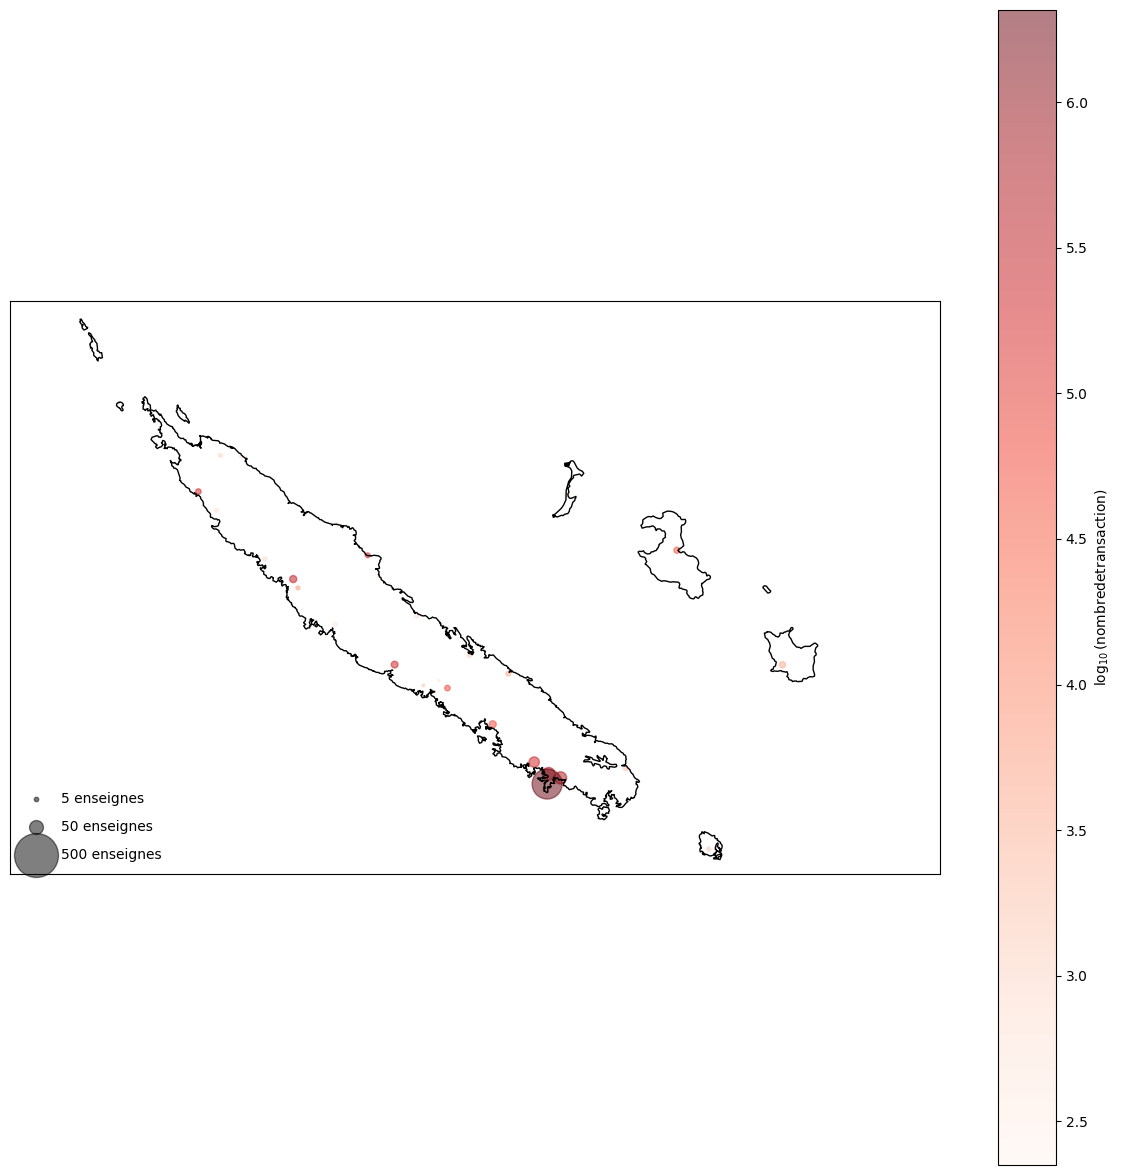

In [117]:
fig = plt.figure(figsize=(15, 15))

m = Basemap(projection = 'ortho', lon_0 = 166, lat_0 = -24.5,
            llcrnrx=-300000, llcrnry=190000, urcrnrx=300000, urcrnry=560000, 
            resolution = 'h')

m.drawcoastlines(linewidth = 1)
m.drawcountries()

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(df_gb_loc.lon, df_gb_loc.lat, latlon=True,
          c=np.log10(df_gb_loc.PRIX_RELEVE), s=df_gb_loc.RAISON_SOCIALE*2,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm nombre de transaction})$')
# plt.clim(3, 7)

# make legend with dummy points
for a in [5, 50, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a*2,
                label=str(a) + ' enseignes')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');